# COMPANY BANKRUPTCY PREDICTION

## Objective: 
This notebook aims to develop a predictive model for corporate bankruptcy using financial data from companies listed on the Taiwan Stock Exchange from 1999 to 2009. The objective is to accurately classify companies as either "bankrupt" or "non-bankrupt" based on a set of financial indicators, thereby providing valuable insights for early identification of financial distress. We start with exploratory data analysis and preprocessing to understand the data's structure and address challenges like class imbalance. Logistic regression is selected as our baseline model, offering a clear performance benchmark before experimenting with more advanced modeling techniques.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import tensorflow as tf
from imblearn.over_sampling import SMOTE, ADASYN
import warnings

#display
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", 100)



# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)

np.random.seed(42)
tf.random.set_seed(42)

2024-11-25 15:29:28.734894: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-25 15:29:28.780826: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-25 15:29:28.795436: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-25 15:29:28.890485: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-25 15:29:30.128628: W tensorflow/compiler/tf2

## 1. Data Exploration
Getting to know our dataset.

In [2]:
df = pd.read_csv("data.csv", index_col=False)
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

### Summary Statistics
Understanding the statistical summary of the dataset. This provides insights into the central tendency and spread of each numerical feature, including count, mean, standard deviation, minimum, and maximum values.

In [5]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

From the summary statistics provided, we can derive several key insights about the dataset's characteristics and potential issues to address:
1. **`Class Imbalance`**: The mean for the `Bankrupt?` column is approximately 0.032, indicating that around 3.2% of the companies in the dataset are bankrupt. This suggests a significant class imbalance, which is common in bankruptcy datasets. We will need to apply resampling techniques or use metrics that handle imbalance, such as precision, recall, and F1 score.

2. **`Feature Ranges and Scales`**: The values in each column vary greatly, with some features ranging up to billions (e.g., Operating Expense Rate, Research and development expense rate) while others are between 0 and 1 (e.g., Current Ratio, Quick Ratio). This wide variation in scales suggests the need for feature scaling, such as normalization or standardization, before feeding the data into a machine learning model. 

3. **`Outliers and Data Distribution`**: Many features have maximum values of 1.0, such as Operating Gross Margin, Realized Sales Gross Margin, and several return-on-asset (ROA) measures. However, some other features have extremely high maximum values, such as Research and development expense rate and Operating Expense Rate. These high values might represent outliers, and handling them could improve model stability and performance. Similarly, several columns have a minimum of 0, and the lower percentiles for some columns are close to zero, suggesting that certain metrics may be zero for some companies, potentially indicating missing information or non-relevant values for those firms.

4. **`Skewness`**: The high standard deviations in some features relative to their means (ex. `Operating Expense Rate`, `Total Asset Growth Rate`) imply substantial variation and likely skewness. Many financial ratios and performance metrics tend to have right-skewed distributions, where a small number of companies have very high values. This could impact model performance, especially if not handled appropriately. So, transformations like logarithmic scaling might reduce skewness.

5. **`Potentially Redundant Features:`** Some features seem to convey similar information, such as multiple variations of profitability ratios (`ROA(C)`, `ROA(A)`, `ROA(B)`, etc.), and liquidity ratios (`Current Ratio`, `Quick Ratio`). We will examine the correlation matrix further toidentify highly correlated features, allowing us to drop or combine some redundant features.

6. **`Feature Scaling and Normalization`**: Given the varied scales of features, we will apply feature scaling methods which will help models converge faster and improve performance. We will try (z-score normalization) or min-max scaling are common choices.

### Exploring Class Balance
Since bankruptcy prediction is often an imbalanced classification problem, we examine the target variable (Bankrupt?) to determine the class distribution.

Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64


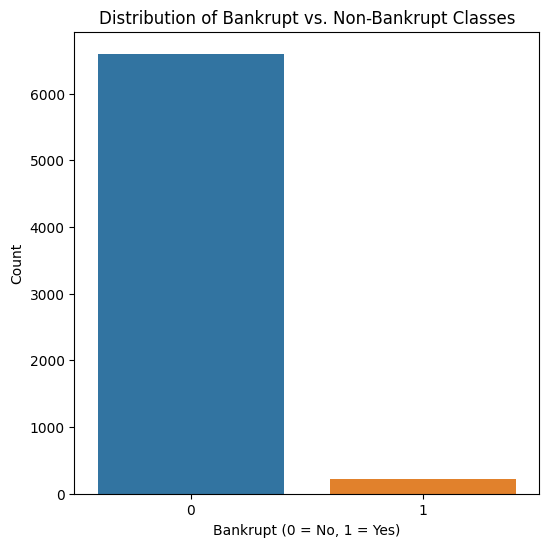

In [6]:
target_distribution = df['Bankrupt?'].value_counts(normalize=True)
print(target_distribution)

#plot to visualize the class distribution of 'Bankrupt?' in the dataset
plt.figure(figsize=(6, 6))
sns.countplot(x='Bankrupt?', data=df)
plt.title('Distribution of Bankrupt vs. Non-Bankrupt Classes')
plt.xlabel('Bankrupt (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


The distribution of the target variable, as shown in Figure above, highlights a significant class imbalance in our dataset, where only about 3.2% of companies are labeled as "Bankrupt" (1), while the vast majority (96.8%) are classified as "Non-Bankrupt" (0). This imbalance is typical in bankruptcy prediction datasets, as the occurrence of bankruptcy is relatively rare compared to the number of companies that remain solvent. However, this imbalance poses challenges for our model experimentation, as many standard algorithms tend to favor the majority class, potentially resulting in poor predictive performance for the minority (bankrupt) class.

To address this imbalance, we may employ several techniques to ensure that our model can effectively identify bankrupt companies. Some common approaches include resampling methods, such as oversampling the bankrupt class, undersampling the non-bankrupt class, or using synthetic data generation techniques like Synthetic Minority Over-sampling Technique (SMOTE). Additionally, we may consider using evaluation metrics, such as precision, recall, F1 score, and area under the Precision-Recall curve, which are better suited to imbalanced datasets than overall accuracy. Addressing this imbalance is essential, as the primary goal of our analysis is to accurately predict bankruptcy, a task that inherently requires strong performance on the minority class.

### Correlation matrix: 
to identify relationships between features. This will be used for feature selection, as highly correlated features may not add much predictive power and could lead to multicollinearity issues.

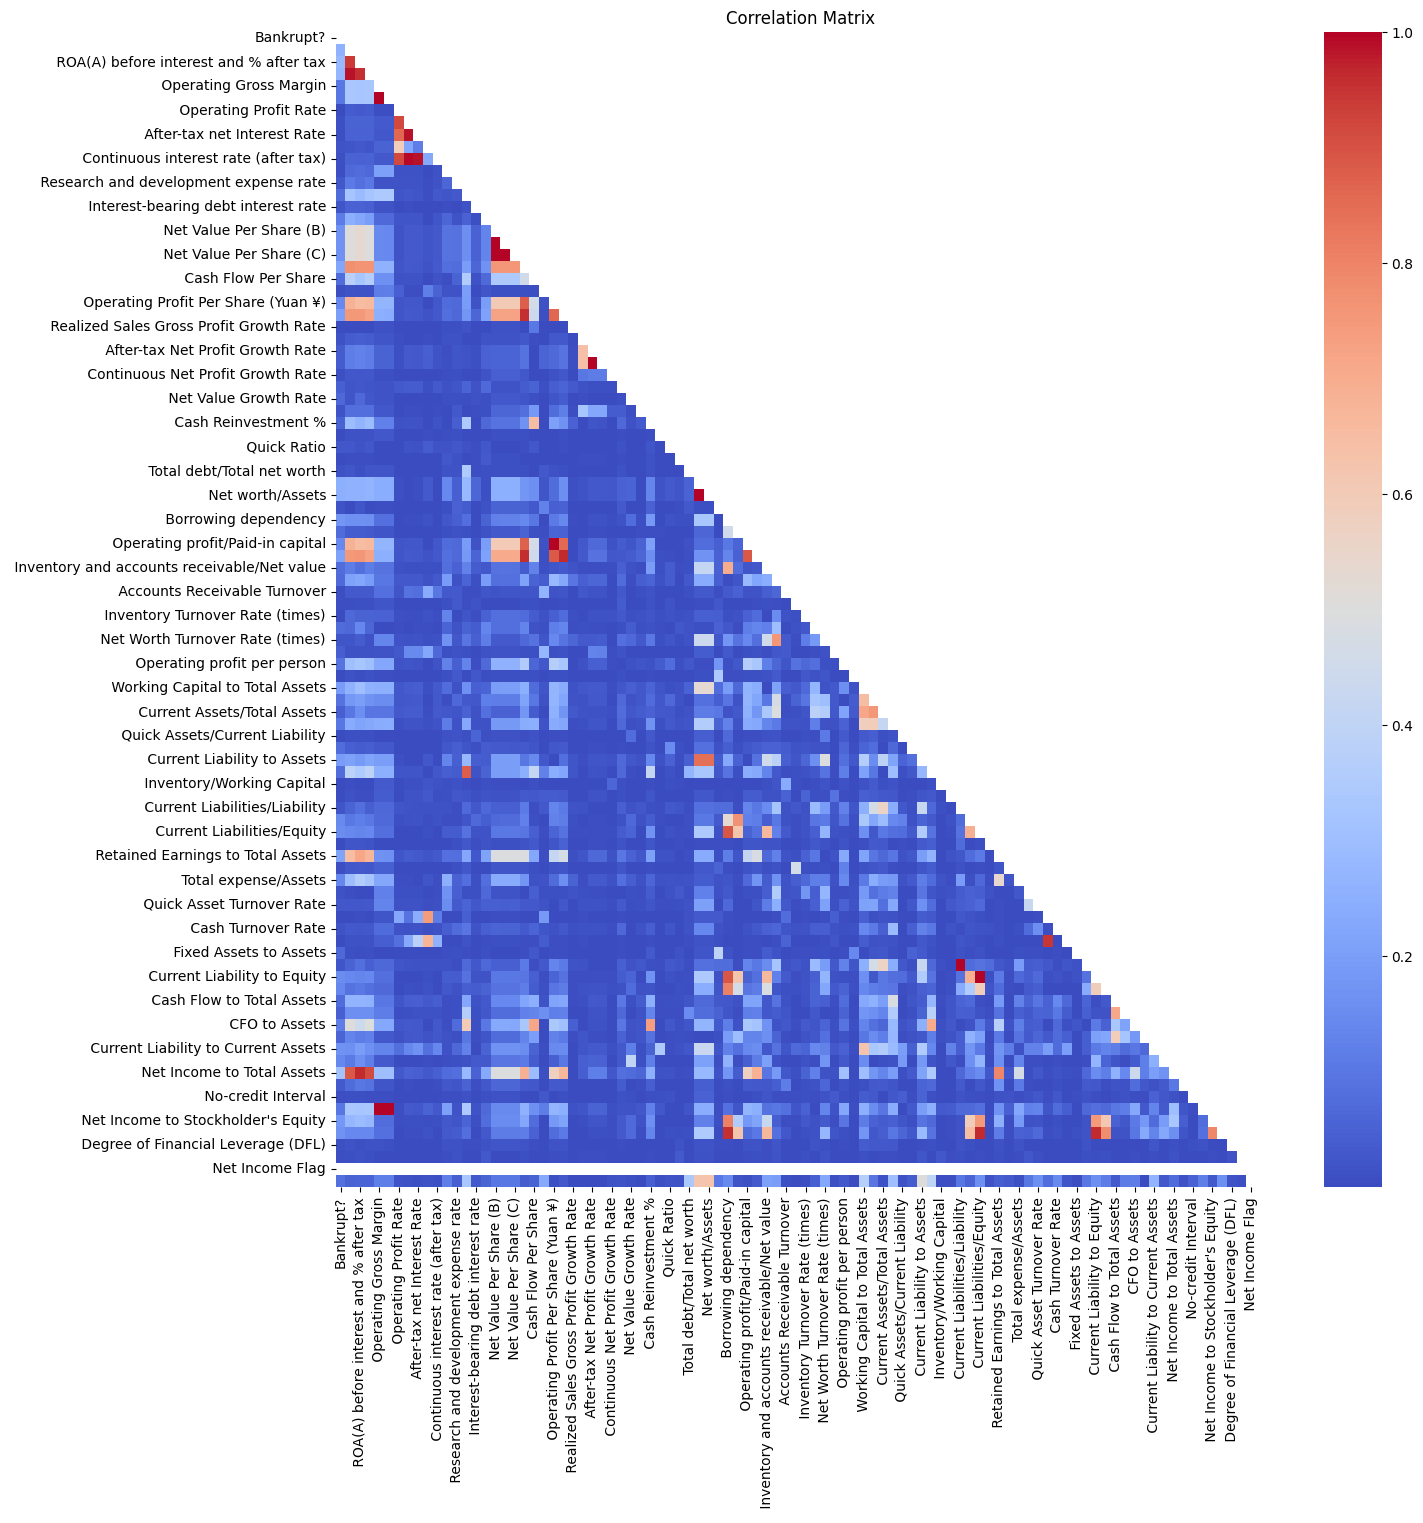

In [7]:
correlation_matrix = df.corr().abs()  # Calculate absolute correlation matrix

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f", mask=mask)
plt.title("Correlation Matrix")
plt.show()


The correlation matrix shown above provides a visual representation of the relationships among the features in our dataset. Each cell in the matrix represents the correlation coefficient between a pair of features, with colors ranging from deep red for high positive correlations to deep blue for high negative correlations. Diagonal elements, representing each feature's correlation with itself, naturally exhibit perfect correlation (a value of 1.0). The matrix highlights several instances of strong correlations between features, suggesting potential redundancy in the dataset. For example, metrics like return-on-assets (ROA), different profitability ratios, and other financial performance indicators tend to exhibit moderate to high correlations with each other, as they often capture related financial information about a company.

To improve the model’s efficiency and avoid issues arising from multicollinearity, we plan to exclude features that have a correlation coefficient greater than 0.90 with other features. By removing highly correlated features, we aim to reduce the dimensionality of the dataset, which can mitigate overfitting, enhance interpretability, and potentially improve model performance. This approach will allow us to retain only the most unique and informative features, ensuring that our predictive models are trained on a streamlined, non-redundant feature set.

## 2. Data Preprocessing

### 1. Feature Selection
To improve the model’s efficiency and avoid issues arising from multicollinearity, we exclude features that have a correlation coefficient greater than 0.90 with other features. 

In [8]:
# Identify features with correlation greater than 0.90
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Select features that are highly correlated (keeping only one feature from each pair)
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.90)]

# Drop features with high correlation
df_reduced = df.drop(columns=high_corr_features)

# Convert the reduced DataFrame to a NumPy array
df_reduced_arr = df_reduced.to_numpy()

df_reduced_arr.shape

(6819, 77)

### 2. Data Shuffling
Shuffling will help ensure that each subset (training, validation, and test) has a similar distribution of classes (bankrupt vs. non-bankrupt companies) and other patterns. This is particularly important in our case given we have an imbalanced dataset, where the minority class might be clustered in one part of the data. Shuffling randomizes the data and helps maintain a balanced representation across splits.

In [9]:
#Shuffle the dataset rows
#Setting a seed for reproducibility
df_reduced = df_reduced.sample(frac=1, random_state=42).reset_index(drop=True)

### 3. Define Outcome Features
We define Y as the target column ('Bankrupt?') and X as the feature set (all columns except 'Bankrupt?').

In [10]:
# Define X & Y and convert to numpy
X = df_reduced.drop(columns=['Bankrupt?']).to_numpy()
print(X.shape)

Y = df_reduced['Bankrupt?'].to_numpy()
print(Y.shape)

(6819, 76)
(6819,)


In [39]:
df_reduced.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0,0.434456,0.596326,0.998791,0.303237,2.217908e-04,3.040000e+09,0.473117,0.000000,0.000000,0.174076,0.202515,0.320153,0.009755,0.087452,0.021977,0.842429,0.685817,0.217409,5.620000e+09,0.000419,0.263370,0.379056,0.016739,0.014061,0.630611,0.001595,0.043807,0.005102,0.369637,0.007023,0.395832,0.065967,0.000781,0.008093,2.967364e-04,5.900000e+09,0.017419,0.004304,0.389498,0.009512,0.787113,0.185681,0.204108,0.046863,0.014760,0.010498,0.023262,0.357598,0.277073,0.005461,0.472822,0.733696,0.326899,0.000000,0.922162,0.002054,0.029762,1.104112e-04,1.054056e-04,0.593969,7.230000e+09,0.624778,0.110933,0.642917,0.459268,0.590226,0.314565,0.017526,0,0.001373,0.626305,0.838369,0.026791,0.565157,1,0.087378
1,0,0.542534,0.603417,0.999041,0.303526,8.550000e+09,1.550000e+09,0.467422,0.000264,0.251645,0.189078,0.232107,0.329561,0.053753,0.115300,0.022079,0.848008,0.689377,0.217591,6.220000e+09,0.000466,0.263868,0.385297,0.009777,0.005425,0.631052,0.007164,0.130000,0.005211,0.376524,0.005366,0.404142,0.193403,0.001051,0.006012,1.282100e-04,2.632612e-04,0.048387,0.018736,0.396938,0.008633,0.809259,0.384289,0.556516,0.049034,0.006546,0.002434,0.106642,0.354767,0.277414,0.008694,0.775494,0.736243,0.331198,0.004023,0.946527,0.002402,0.021704,1.051830e-04,7.420000e+09,0.593946,2.720000e+09,0.362928,0.114698,0.641826,0.459059,0.624217,0.314383,0.029840,0,0.001010,0.625384,0.841846,0.026904,0.565645,1,0.028519
2,0,0.584897,0.610567,0.999079,0.303560,1.520620e-04,4.620000e+09,0.477995,0.000000,0.248203,0.186928,0.244020,0.334123,0.055598,0.125886,0.022124,0.848081,0.689454,0.217601,9.170000e+08,0.000524,0.264255,0.403068,0.013770,0.011747,0.630615,0.003319,0.078635,0.006838,0.369637,0.005945,0.398379,0.313343,0.002061,0.003067,3.976230e-04,1.409355e-03,0.055000,0.022699,0.400896,0.002025,0.831848,0.478858,0.526841,0.187792,0.012113,0.013740,0.072207,0.383311,0.277090,0.004631,0.853168,0

### 4. Data Splitting
Before we proceed to normalization/one-hot encoding, feature selection and engineering, we will split the data sets into training, validation and test data sets. This ensures that the test and validation sets remain truly independent from the training data. It prevents data leakage and maintains real world conditions.

First, we split the data into a training set (60%) and a temporary set (40%) using train_test_split.
Then, we further split the temporary set into validation (20%) and test (20%) sets.

In [11]:
# Split into training (60%) and a temporary set (40%) for validation and test
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)

# Further split the temporary set into validation (20%) and test (20%) sets
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Step 6: Verify the shapes of the resulting splits
print("Shapes of the datasets:")
print("X_train:", X_train.shape, "Y_train:", Y_train.shape)
print("X_val:", X_val.shape, "Y_val:", Y_val.shape)
print("X_test:", X_test.shape, "Y_test:", Y_test.shape)

Shapes of the datasets:
X_train: (4091, 76) Y_train: (4091,)
X_val: (1364, 76) Y_val: (1364,)
X_test: (1364, 76) Y_test: (1364,)


### 5. Normalization and Standardization
In our classification task, we standardize the features in X_train, X_val, and X_test to ensure that each feature contributes on a comparable scale, which is particularly beneficial for algorithms that rely on distance or gradient-based optimization, such as logistic regression, neural networks, and support vector machines. Without standardization, features with larger ranges could dominate the learning process, leading the model to prioritize certain features over others, even if they aren’t necessarily more informative. Standardization scales each feature to have a mean of 0 and a standard deviation of 1, which helps the model converge more efficiently and prevents it from being biased towards features with naturally larger values. This also ensures that regularization, if applied, affects each feature equally, enhancing model stability and performance across diverse features.

We do not standardize y_train, y_val, and y_test in a classification task like bankruptcy prediction. In classification problems, the target variable (y) typically consists of categorical labels (e.g., 0 for non-bankrupt and 1 for bankrupt). These labels represent classes rather than continuous values, so standardizing them would not make sense and would interfere with the model’s ability to classify.

In [12]:
# Standardize all features in X_train, X_val, and X_test
scaler = StandardScaler()

# Fitting the scaler on the training data only
scaler.fit(X_train)   # Fit the scaler on the training data to compute mean and std.
X_train_std = scaler.transform(X_train) #standardize training data
X_val_std = scaler.transform(X_val) 
X_test_std = scaler.transform(X_test)

## Modeling

### 1. Baseline Model
We selected logistic regression as our baseline model due to its simplicity, interpretability, and reliability in binary classification tasks. As a straightforward algorithm, logistic regression provides a solid reference point, allowing us to benchmark performance before moving to more complex models that may address the class imbalance more effectively.

In [ ]:
# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_std, Y_train)

# Predict on the test set
y_pred = logreg.predict(X_val_std)
y_prob = logreg.predict_proba(X_val_std)[:, 1]  # For ROC-AUC score

# Evaluate the model
classification_rep = classification_report(Y_val, y_pred)
conf_matrix = confusion_matrix(Y_val, y_pred)
roc_auc = roc_auc_score(Y_val, y_prob)

# Calculate accuracy
accuracy = accuracy_score(Y_val, y_pred)

print(classification_rep)
print(f"ROC-AUC: {roc_auc}")
print(f"Overall accuracy: {accuracy}")

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1328
           1       0.33      0.19      0.25        36

    accuracy                           0.97      1364
   macro avg       0.66      0.59      0.61      1364
weighted avg       0.96      0.97      0.96      1364

ROC-AUC: 0.8408529953145917
Overall accuracy: 0.968475073313783


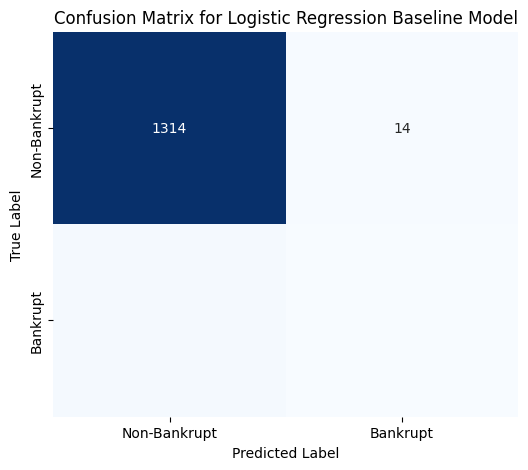

In [14]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_val, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Non-Bankrupt', 'Bankrupt'], yticklabels=['Non-Bankrupt', 'Bankrupt'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression Baseline Model")
plt.show()

The confusion matrix for the logistic regression baseline model on the validation dataset shows a significant imbalance in the model's predictive capabilities. The model correctly classified 1,314 non-bankrupt companies (true negatives) and misclassified 14 as bankrupt (false positives), indicating high accuracy for the majority class. However, the model only correctly identified 7 bankrupt companies (7 true positives), misclassifying the 29 other truly bankrupt companies as non-bankrupt (false negatives).

This pattern highlights a common issue in highly imbalanced datasets, where the model becomes biased toward the majority class, leading to poor performance on the minority class (bankrupt companies in this case). This results in a high overall accuracy but reveals the model’s inability to detect bankrupt companies, which is the primary focus of this classification task. This indicates that additional techniques, such as class balancing, resampling, or more sophisticated algorithms, are necessary to improve performance on the minority class.

### 2. Balancing training data

Having imbalanced training data can lead to having a poorly-performing learned model. We see this occur in the learned baseline classifier, where the model almost exclusively predicts the majority class. Due to the highly imbalanced data, the baseline classifier appears to have high accuracy (97% on the validation data), however, this is driven by correctly predicting 'non-bankrupt' rather than being able to predict which companies will go bankrupt. We can see evidence of this poor performance on the minority class in the validation precision and recall for class 1: 33% and 19%, respectively.

We employ several techniques to address the class imbalance in the training data with the goal of improving precision and recall for the minority class. To evaluate how various class balancing techniques perform on our dataset, we will train a logistic regression in the same way as the baseline classifier was trained on re-balanced datasets. Then we can compare performance of learned models between the baseline and models using various balancing techniques.

In [15]:
# define an instance of the early_stopping class
early_stopping = tf.keras.callbacks.EarlyStopping(
monitor='val_loss', 
verbose=1,
patience=5,
mode='max',
restore_best_weights=True)

# train a basic neural network using code from homeworks
def build_model_nn(hidden_layer_sizes=[],
              activation='relu',
              optimizer='SGD',
              learning_rate=0.01,
              metric='accuracy'):
  """Build a multi-class logistic regression model using Keras.

  Args:
  n_classes: Number of output classes in the dataset.
  hidden_layer_sizes: A list with the number of units in each hidden layer.
  activation: The activation function to use for the hidden layers.
  optimizer: The optimizer to use (SGD, Adam).
  learning_rate: The desired learning rate for the optimizer.
  metric: The desired metric.

  Returns:
  model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(42)
  tf.random.set_seed(42)

  # YOUR CODE HERE
  model = tf.keras.Sequential()

  # hidden layers
  for i in hidden_layer_sizes:
    model.add(tf.keras.layers.Dense(
      units=i,                    # output dim
      use_bias=True,               # use a bias (intercept) param
      activation=activation,     # function argument for hidden layers

  ))
  # output layer
  model.add(tf.keras.layers.Dense(
      units=1,       # output dim
      use_bias=True,               # use a bias (intercept) param
      activation='sigmoid',     # for binary classification

  ))
  # Compile the model
  if optimizer=='Adam':
    tf_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  elif optimizer=='SGD':
    tf_optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  else:
    raise Exception("invalid optimizer")

  model.compile(optimizer=tf_optimizer, loss="binary_crossentropy", metrics=[metric])  

  return model

def train_and_evaluate(X_train,
                       Y_train,
                       hidden_layer_sizes=[],
                       activation='relu',
                       optimizer='Adam',
                       learning_rate=0.01,
                       metric='accuracy',
                       num_epochs=10):

  # Build the model.
    model = build_model_nn(hidden_layer_sizes=hidden_layer_sizes,
                      activation=activation,
                      optimizer=optimizer,
                      metric=metric,
                      learning_rate=learning_rate)


  # Train the model.
    history = model.fit(
        x=X_train,
        y=Y_train,
        epochs=num_epochs,
        batch_size=256, # increasing so that there are more positive examples per batch
        validation_data=(X_val, Y_val),
        verbose=0, 
        callbacks=[early_stopping])

    # Retrieve the training metrics (after each train epoch) and the final validation
    # accuracy.
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    ax[0].plot(train_accuracy, label='train_accuracy')
    ax[0].plot(val_accuracy, label='validation accuracy')
    ax[0].set_xticks(range(num_epochs))
    ax[0].set_xlabel('Train epochs')
    ax[0].legend()

    # Add confusion matrix to the plot display
    conf_matrix = confusion_matrix(Y_val, y_pred)
    sns.heatmap(conf_matrix, 
                annot=True, 
                fmt="d", 
                cmap="Blues", 
                cbar=False, 
                xticklabels=['Non-Bankrupt', 'Bankrupt'], 
                yticklabels=['Non-Bankrupt', 'Bankrupt'],
                ax=ax[1])
    ax[1].set_xlabel('Predicted Label')
    ax[1].set_ylabel('True Label')

    plt.show()
    
    print(f'Training accuracy: {train_accuracy[-1]:.2%}')
    print(f'Validation accuracy: {val_accuracy[-1]:.2%}')
    # performance metrics for minority class
    print(f"minority class precision: {conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[0][1]):.2%}")
    print(f"minority class recall: {conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[1][0]):.2%}")

    return model

#### a. Upsampling using random sampling with replacement

The first technique is the basic upsampling to balance the classes by making copies of random examples from the minority class. In doing so, we are increasing the frequency of positive class examples but not adding any variation to the features of the examples in the positive class which may lead to overfitting or memorization of the replicated positive class examples.

In [16]:
# subset standardized data by training label
X_train_pos = X_train_std[Y_train==1]
X_train_neg = X_train_std[Y_train==0]

# upsample positive class
num_samples = len(X_train_neg) - len(X_train_pos)
X_train_pos_upsampled = sklearn.utils.resample(X_train_pos, n_samples=num_samples, random_state=42)
Y_train_pos_upsampled = np.ones((len(X_train_pos_upsampled),))

X_train_upsampled = np.vstack([X_train_pos, X_train_neg, X_train_pos_upsampled])
Y_train_upsampled = np.concatenate([Y_train, Y_train_pos_upsampled])

print(f"X_train_upsampled shape: {X_train_upsampled.shape}")
print(f"Y_train_upsampled shape: {Y_train_upsampled.shape}")
print(f"Count by class after upsampling:\n{pd.Series(Y_train_upsampled).value_counts()}")

X_train_upsampled shape: (7928, 76)
Y_train_upsampled shape: (7928,)
Count by class after upsampling:
0.0    3964
1.0    3964
Name: count, dtype: int64


              precision    recall  f1-score   support

           0       0.97      0.80      0.88      1328
           1       0.02      0.17      0.04        36

    accuracy                           0.78      1364
   macro avg       0.50      0.48      0.46      1364
weighted avg       0.95      0.78      0.85      1364

ROC AUC score: 0.48205


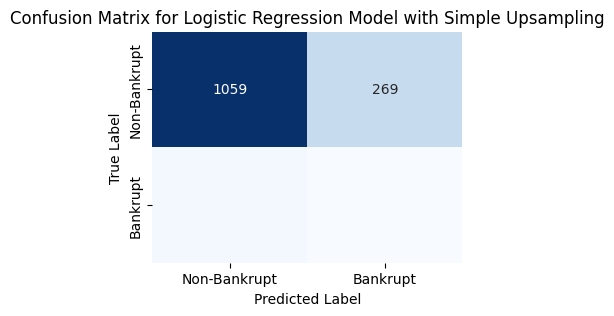

In [17]:
# re-train logistic regression
logreg_upsampling = LogisticRegression(max_iter=1000)
logreg_upsampling.fit(X_train_upsampled, Y_train_upsampled)

# Predict on the test set
y_pred = logreg_upsampling.predict(X_val)

# Evaluate the model
classification_rep = classification_report(Y_val, y_pred)
print(classification_rep)
roc_auc = roc_auc_score(Y_val, y_pred)
print(f"ROC AUC score: {roc_auc:.5f}")

# confusion matrix
conf_matrix = confusion_matrix(Y_val, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Non-Bankrupt', 'Bankrupt'], yticklabels=['Non-Bankrupt', 'Bankrupt'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression Model with Simple Upsampling")
plt.show()

In the above, we see that the simple logistic regression model trained on the upsampled data predicts the minority class more frequently than the baseline model (267 examples vs. 21 examples), however, the updated model is only correct in those predictions in 6 of 267 cases. The increase in false positives with little change in the number of false negatives brings the overall accuracy of the model down to 79% on the validation data. Looking at the minority class specifically, we see precision is only 2% due to the high number of false positives, a decrease from the baseline model. Recall for the minority class is 17%, the decrease in this metric over the baseline classifier reflects one fewer example correctly classified as bankrupt (6 vs. 7).

In a real-world scenario for a company issuing loans or writing insurance where there is a large cost to bankruptcy, a company may be ok in sacrificing accuracy and performance on the majority class to be able to more frequently identify bankruptcy. In these cases, recall on the positive class is a metric we will want to prioritize while not letting accuracy and minority class performance degrade too much, since there's also a cost to flagging too many companies for risk of bankrupcy. ROC AUC score which summarizes the ROC curve (false positive rate and true positive rate at various thresholds) has decreased from the baseline model to this model which employs random upsampling. Therefore, there is not evidence that this data balancing technique provides imporovement over the baseline model.

#### b. SMOTE

SMOTE is another technique to balance a training dataset. Unlike sampling with replacement as displayed above, SMOTE creates synthetic examples by performing certain operations on training data examples, introducing more variation in the positive examples the model learns from. According to [Chawla, et al. (2002)](https://arxiv.org/pdf/1106.1813), "[t]he minority class is over-sampled by taking each minority class sample and introducing synthetic examples along the line segments joining any/all of the k minority class nearest neighbors." For our experimentation, we implement SMOTE using the imbalanced-learn package.

Count by class after upsampling:
0    3964
1    3964
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.97      0.73      0.83      1328
           1       0.02      0.19      0.03        36

    accuracy                           0.71      1364
   macro avg       0.49      0.46      0.43      1364
weighted avg       0.95      0.71      0.81      1364

ROC AUC score: 0.46017


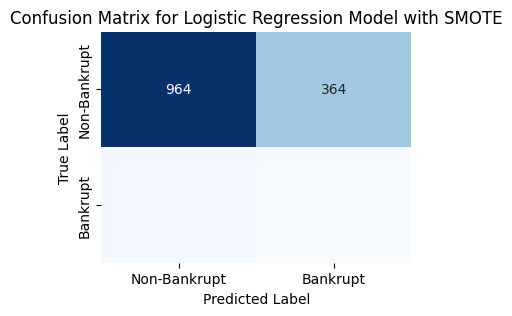

In [18]:
# oversample using SMOTE
sm = SMOTE(sampling_strategy='minority', k_neighbors=3, random_state=42)
X_train_res_smote, Y_train_res_smote = sm.fit_resample(X_train_std, Y_train)
print(f"Count by class after upsampling:\n{pd.Series(Y_train_res_smote).value_counts()}")

# re-train logistic regression
logreg_smote = LogisticRegression(max_iter=1000)
logreg_smote.fit(X_train_res_smote, Y_train_res_smote)

# Predict on the test set
y_pred = logreg_smote.predict(X_val)

# Evaluate the model
classification_rep = classification_report(Y_val, y_pred)
print(classification_rep)
roc_auc = roc_auc_score(Y_val, y_pred)
print(f"ROC AUC score: {roc_auc:.5f}")

# confusion matrix
conf_matrix = confusion_matrix(Y_val, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Non-Bankrupt', 'Bankrupt'], yticklabels=['Non-Bankrupt', 'Bankrupt'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression Model with SMOTE")
plt.show()

Similar to SMOTE, [ADASYN](https://imbalanced-learn.org/stable/over_sampling.html#from-random-over-sampling-to-smote-and-adasyn), or Adaptive Synthetic sampling, is an algorithm that generates synthetic examples for model training using k-Nearest Neighbors. ADASYN takes the method used in SMOTE a step further by focusing on creating new examples that are similar to training examples that are difficult to classify. The way that ADASYN does this is by finding training examples that are more likely to be misclassified by a KNN classifier and generating synthetic examples close to those points  that are next to original samples in the dataset ([Danquah, 2020](https://www.arxiv.org/pdf/2010.04326)). 

Count by class after upsampling:
0    3964
1    3959
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.97      0.78      0.87      1328
           1       0.02      0.14      0.03        36

    accuracy                           0.76      1364
   macro avg       0.49      0.46      0.45      1364
weighted avg       0.95      0.76      0.84      1364

ROC AUC score: 0.45950


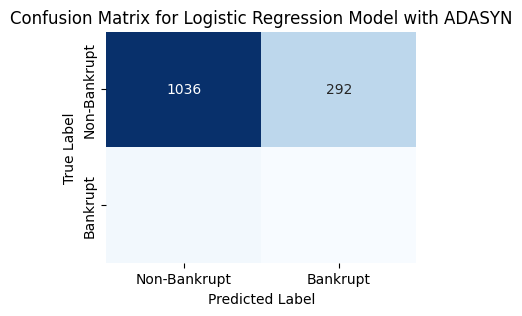

In [19]:
# oversample using ADASYN
sm = ADASYN(sampling_strategy='minority', n_neighbors=5, random_state=42)
X_train_res_adasyn, Y_train_res_adasyn = sm.fit_resample(X_train_std, Y_train)
print(f"Count by class after upsampling:\n{pd.Series(Y_train_res_adasyn).value_counts()}")

# re-train logistic regression
logreg_adasyn = LogisticRegression(max_iter=1000)
logreg_adasyn.fit(X_train_res_adasyn, Y_train_res_adasyn)

# Predict on the test set
y_pred = logreg_adasyn.predict(X_val)

# Evaluate the model
classification_rep = classification_report(Y_val, y_pred)
print(classification_rep)
roc_auc = roc_auc_score(Y_val, y_pred)
print(f"ROC AUC score: {roc_auc:.5f}")

# confusion matrix
conf_matrix = confusion_matrix(Y_val, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Non-Bankrupt', 'Bankrupt'], yticklabels=['Non-Bankrupt', 'Bankrupt'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression Model with ADASYN")
plt.show()

We don't see much lift from the oversampling techniques, but SMOTE has the highest recall for class 1.

## Experimenting 

### 1. Logistic regression model using the Keras Sequential API:

For this model we’ll use the data sets before the balancing techniques. 
1. First, we clear the session to ensure we have a clear model and avoid conflicts.
2. Set the random seed to 42 to match our base model.
3. Define the Input layer for our number of features.
4. Define the output layer for single binary classification, sigmoid activation, and RandomNormal(stddev = 0.01) initializers for the kernel and bias.
5. The model will use the Adam optimizer to improve convergence
6. Finally the loss function for binary classification BinaryCrossentropy()


In [20]:
# define an instance of the early_stopping class
early_stopping = tf.keras.callbacks.EarlyStopping(
monitor='val_loss', 
verbose=1,
patience=5,
mode='max',
restore_best_weights=True)

def build_model(num_features, learning_rate):
    """Return a simple logistic regression model using the Keras Sequential API."""
    # Clear session and set a random seed for consistent behavior.
    tf.keras.backend.clear_session()
    tf.random.set_seed(42)
    
    # Use Keras Sequential API to build a logistic regression model
    model = tf.keras.Sequential()
    
    # Create input layer
    model.add(tf.keras.Input(shape=(num_features,), name='Input'))
    
    # Create output layer
    model.add(tf.keras.layers.Dense(
        units=1,  # Single unit for binary classification
        use_bias=True,
        activation='sigmoid',  # Sigmoid activation for binary classification
        kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.01),
        bias_initializer=tf.keras.initializers.RandomNormal(stddev=0.01),
        name='Output'
    ))
    
    # Define the optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    # Compile model with Binary Crossentropy loss for binary classification
    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=optimizer,
        metrics=['accuracy']
    )
    
    return model

In [21]:
#Build the model
features = df_reduced.drop(columns=['Bankrupt?']).columns #isolate the features

learning_rate = 0.01
model_tf = build_model(num_features=len(features), learning_rate=learning_rate)

In [22]:
#Fit the model with 20 epochs and 32 batch size
epochs = 20
batch_size = 32

# Train model
history = model_tf.fit(x=X_train_std,
                y=Y_train,
                validation_data=[X_test_std, Y_test],
                batch_size= batch_size,
                epochs=epochs,
                callbacks=[early_stopping],
                verbose=0
                
)

Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 3.


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


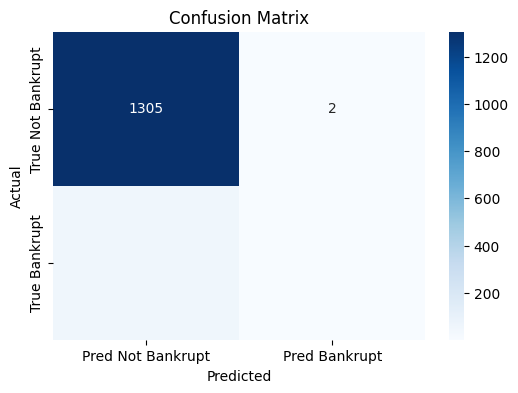

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1307
           1       0.67      0.07      0.13        57

    accuracy                           0.96      1364
   macro avg       0.81      0.53      0.55      1364
weighted avg       0.95      0.96      0.94      1364

Model Accuracy: 96.0%


In [23]:
# Get predictions for the test set
y_pred_prob = model_tf.predict(X_test_std)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Pred Not Bankrupt', 'Pred Bankrupt'], yticklabels=['True Not Bankrupt', 'True Bankrupt'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Evaluate the model
classification_rep = classification_report(Y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(classification_rep)
print(f'Model Accuracy: {round(accuracy, 2)*100}%')

The model achieves a high overall accuracy of 96.0%, indicating strong performance in classifying the majority class (Non-Bankrupt). The precision and recall for class 0 are excellent, with a perfect recall (1.00). However, the performance for class 1 (Bankruptcy) is poor, with a precision of 0.60, recall of 0.16. This suggests that the model struggles with identifying instances of the minority class, likely due to class imbalance. We will try to run the same technique with balanced data using SMOTE.

## 2. Logistic regression model using the Keras Sequential API with SMOTE:

For this model we’ll use the data sets with SMOTE 
1. First, we clear the session to ensure we have a clear model and avoid conflicts.
2. Set the random seed to 42 to match our base model.
3. Define the Input layer for our number of features.
4. Define the output layer for single binary classification, sigmoid activation, and RandomNormal(stddev = 0.01) initializers for the kernel and bias.
5. The model will use the Adam optimizer to improve convergence
6. Finally the loss function for binary classification BinaryCrossentropy()

In [24]:
features = df_reduced.drop(columns=['Bankrupt?']).columns #isolate the features
learning_rate = 0.01

model_tf_smote = build_model(num_features=len(features), learning_rate=learning_rate)

In [25]:
epochs = 20
batch_size = 32

# Train model with SMOTE
history = model_tf_smote.fit(x=X_train_res_smote,
                y=Y_train_res_smote,
                validation_data=[X_test_std, Y_test],
                batch_size= batch_size,
                epochs=epochs,
                callbacks=[early_stopping],
                verbose=0
)

Restoring model weights from the end of the best epoch: 20.


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


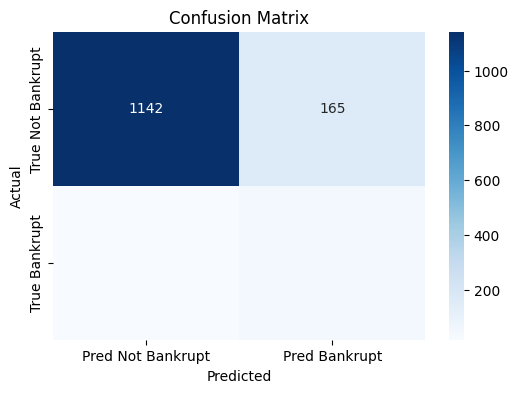

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1307
           1       0.20      0.70      0.31        57

    accuracy                           0.87      1364
   macro avg       0.59      0.79      0.62      1364
weighted avg       0.95      0.87      0.90      1364

Model Accuracy: 87.0%


In [26]:
# Get predictions for the test set
y_pred_prob = model_tf_smote.predict(X_test_std)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Pred Not Bankrupt', 'Pred Bankrupt'], yticklabels=['True Not Bankrupt', 'True Bankrupt'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Evaluate the model
classification_rep = classification_report(Y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(classification_rep)
print(f'Model Accuracy: {round(accuracy, 2)*100}%')

After applying SMOTE to balance the dataset, the model's overall accuracy decreased to 87.0%. For class 0 Non-Bankrupt, the precision remains high at 0.99, but recall dropped to 0.87. For class 1 Bankrupt, the recall improved significantly to 0.70, but precision is low at 0.20. Recall is important for us as we would like to predict Bankrupt companies even if that means increase false positives.
While SMOTE improved the model's ability to detect the minority class (1) Bankrupt, precision and overall performance for this class remain limited, suggesting room for further optimization.


### 4. Random Forest and Sampling
In this fourth model, we used a Random Forest Classifier to improve our classification of bankrupt companies. Random Forests are an ensemble method that combines multiple decision trees to make more robust predictions. Unlike logistic regression, which relies on a linear decision boundary, Random Forests can capture more complex, non-linear relationships in the data, which can help in identifying bankrupt companies even in an imbalanced dataset.

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model
rf_classifier.fit(X_train, Y_train)

# Predict on the validation
y_pred_rf = rf_classifier.predict(X_val)
y_prob_rf = rf_classifier.predict_proba(X_val)[:, 1]  # For ROC-AUC score

# Evaluate the model
classification_rep_rf = classification_report(Y_val, y_pred_rf)
conf_matrix_rf = confusion_matrix(Y_val, y_pred_rf)
roc_auc_rf = roc_auc_score(Y_val, y_prob_rf)
accuracy_rf = accuracy_score(Y_val, y_pred_rf)

print(classification_rep_rf), 
print(conf_matrix_rf), 
print(roc_auc_rf), 
print(accuracy_rf)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1328
           1       0.50      0.08      0.14        36

    accuracy                           0.97      1364
   macro avg       0.74      0.54      0.56      1364
weighted avg       0.96      0.97      0.96      1364

[[1325    3]
 [  33    3]]
0.9042001338688086
0.9736070381231672


- Precision (Bankruptcy): 0.50 – Indicates that half of the predictions for bankruptcy are correct, but many false positives still occur.
- Recall (Bankruptcy): 0.08 – Captures only 8% of actual bankrupt companies, meaning it misses most.
- F1-Score (Bankruptcy): 0.14 – Poor balance between precision and recall due to very low recall.
- ROC AUC: 0.904 – Overall good separation between classes, but it doesn't focus specifically on the minority class.
- Confusion Matrix: 33 out of 36 bankruptcies were misclassified as non-bankrupt.
- Insight: Random Forest struggles with recall, which is critical for identifying bankruptcies, making it unsuitable for our task.

### 5. XGBOOST
Gradient Boosting methods (e.g., XGBoost, LightGBM) tend to be more flexible and can handle imbalanced data better than Random Forests. These models iteratively improve on misclassified examples, which can help capture patterns in the minority class (bankrupt companies) more effectively.

- XGBoost allows you to set a scale_pos_weight parameter to handle class imbalance, which can be set to the ratio of the majority to minority classes.

In [28]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Set up the scale_pos_weight based on the imbalance ratio
scale_pos_weight = len(Y_train[Y_train == 0]) / len(Y_train[Y_train == 1])

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight)
xgb_model.fit(X_train, Y_train)

# Predict on the validation set
y_pred_xgb = xgb_model.predict(X_val)
y_prob_xgb = xgb_model.predict_proba(X_val)[:, 1]

# Evaluate the model
print("XGBoost Model Performance")
print(classification_report(Y_val, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(Y_val, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(Y_val, y_prob_xgb))
print("Accuracy:", accuracy_score(Y_val, y_pred_xgb))


XGBoost Model Performance
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1328
           1       0.40      0.39      0.39        36

    accuracy                           0.97      1364
   macro avg       0.69      0.69      0.69      1364
weighted avg       0.97      0.97      0.97      1364

Confusion Matrix:
 [[1307   21]
 [  22   14]]
ROC AUC Score: 0.9404074631860777
Accuracy: 0.968475073313783


- Precision (Bankruptcy): 0.40 – Out of all predicted bankruptcies, 40% are correct, showing moderate accuracy for positive predictions.
- Recall (Bankruptcy): 0.39 – Captures 39% of actual bankruptcies, significantly better than Random Forest.
- F1-Score (Bankruptcy): 0.39 – Balanced performance between precision and recall, but both remain moderate.
- ROC AUC: 0.940 – Good overall performance in distinguishing between classes.
- Confusion Matrix: Correctly identifies 14 bankruptcies but still misclassifies 22.
- Insight: XGBoost is a significant improvement over Random Forest, with better recall and F1-score, but it still misses a substantial number of bankruptcies.

### 6. LightGBM with Class Weighting
LightGBM offers a class_weight parameter that can be set to balanced, or you can manually provide class weights.

In [29]:
import lightgbm as lgb

# Define class weights
class_weights = {0: 1, 1: scale_pos_weight}

# Initialize and train the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42, class_weight=class_weights)
lgb_model.fit(X_train, Y_train)

# Predict on the validation set
y_pred_lgb = lgb_model.predict(X_val)
y_prob_lgb = lgb_model.predict_proba(X_val)[:, 1]

# Evaluate the model
print("LightGBM Model Performance")
print(classification_report(Y_val, y_pred_lgb))
print("Confusion Matrix:\n", confusion_matrix(Y_val, y_pred_lgb))
print("ROC AUC Score:", roc_auc_score(Y_val, y_prob_lgb))
print("Accuracy:", accuracy_score(Y_val, y_pred_lgb))

[LightGBM] [Info] Number of positive: 127, number of negative: 3964
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001933 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18866
[LightGBM] [Info] Number of data points in the train set: 4091, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
LightGBM Model Performance
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1328
           1       0.44      0.42      0.43        36

    accuracy                           0.97      1364
   macro avg       0.71      0.70      0.71      1364
weighted avg       0.97      0.97      0.97      1364

Confusion Matrix:
 [[1309   19]
 [  21   15]]
ROC AUC Score: 0.925033467202142
Accuracy: 0.9706744868035191


- Precision (Bankruptcy): 0.44 – Slightly higher than XGBoost, indicating fewer false positives.
- Recall (Bankruptcy): 0.42 – Better than XGBoost, capturing 42% of bankrupt companies.
- F1-Score (Bankruptcy): 0.43 – Reflects balanced improvement in precision and recall compared to XGBoost.
- ROC AUC: 0.925 – High class-separation performance.
- Confusion Matrix: Correctly identifies 15 bankruptcies and misclassifies 21.
- Insight: LightGBM edges out XGBoost slightly with better precision and recall, making it a solid contender.

### 7. Balanced Random Forest 
Use a variation of Random Forest called Balanced Random Forest, which performs balanced resampling in each bootstrap sample to improve minority class focus.

The BalancedRandomForestClassifier is available in the imblearn package, which is specifically designed to handle imbalanced datasets by undersampling the majority class in each bootstrap sample.

In [30]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Initialize and train the Balanced Random Forest model
brf_model = BalancedRandomForestClassifier(random_state=42)
brf_model.fit(X_train, Y_train)

# Predict on the test set
y_pred_brf = brf_model.predict(X_val)
y_prob_brf = brf_model.predict_proba(X_val)[:, 1]

# Evaluate the model
print("Balanced Random Forest Model Performance")
print(classification_report(Y_val, y_pred_brf))
print("Confusion Matrix:\n", confusion_matrix(Y_val, y_pred_brf))
print("ROC AUC Score:", roc_auc_score(Y_val, y_prob_brf))
print("Accuracy:", accuracy_score(Y_val, y_pred_brf))


Balanced Random Forest Model Performance
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      1328
           1       0.14      0.89      0.25        36

    accuracy                           0.86      1364
   macro avg       0.57      0.87      0.58      1364
weighted avg       0.97      0.86      0.90      1364

Confusion Matrix:
 [[1138  190]
 [   4   32]]
ROC AUC Score: 0.9442875669344042
Accuracy: 0.8577712609970675


- Precision (Bankruptcy): 0.14 – Very low precision, indicating most bankruptcy predictions are false positives.
- Recall (Bankruptcy): 0.89 – Captures 89% of bankruptcies, by far the highest recall among models.
- F1-Score (Bankruptcy): 0.25 – Despite the low precision, the high recall raises the F1-score above Random Forest.
- ROC AUC: 0.944 – The best class separation among all models.
- Confusion Matrix: Correctly identifies 32 bankruptcies, missing only 4, but at the cost of 190 false positives.
- Insight: Balanced Random Forest prioritizes recall and does a stellar job in identifying bankrupt companies. However, the high number of false positives (low precision) could create significant noise for follow-up actions.

Plotting Metrics for All tree based Models

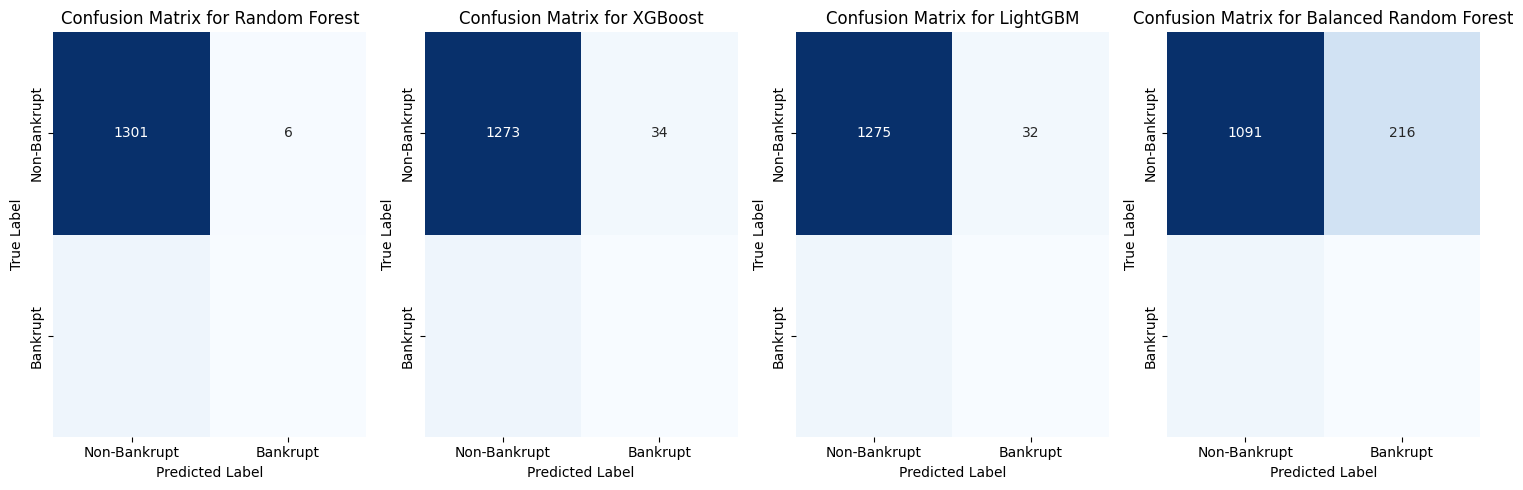

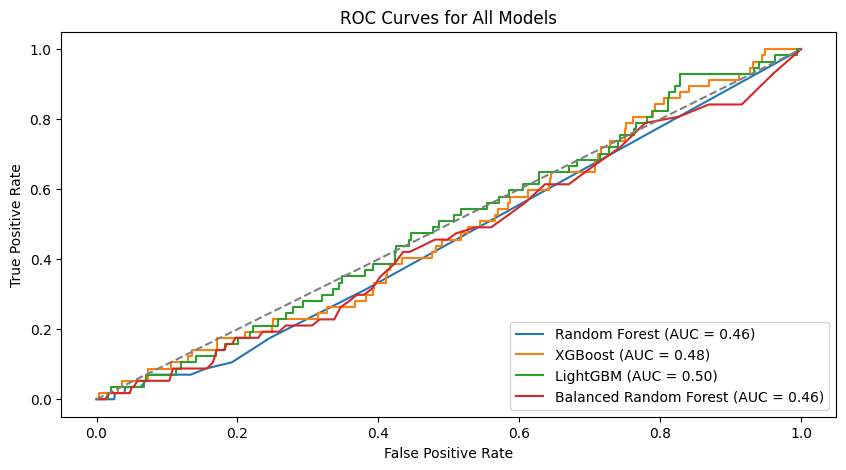

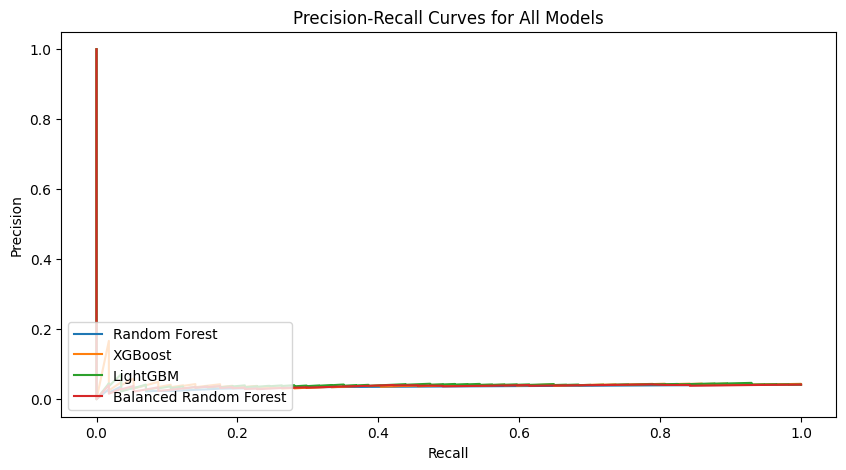

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix

# List of models and their predicted values and probabilities
models = {
    "Random Forest": (y_pred_rf, y_prob_rf),
    "XGBoost": (y_pred_xgb, y_prob_xgb),
    "LightGBM": (y_pred_lgb, y_prob_lgb),
    "Balanced Random Forest": (y_pred_brf, y_prob_brf)
}

# Confusion Matrix Plots
plt.figure(figsize=(15, 5))
for i, (model_name, (y_pred, _)) in enumerate(models.items(), 1):
    conf_matrix = confusion_matrix(Y_test, y_pred)
    plt.subplot(1, 4, i)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=['Non-Bankrupt', 'Bankrupt'], yticklabels=['Non-Bankrupt', 'Bankrupt'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {model_name}")

plt.tight_layout()
plt.show()

# ROC Curve Plots
plt.figure(figsize=(10, 5))
for model_name, (_, y_prob) in models.items():
    fpr, tpr, _ = roc_curve(Y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve Plots
plt.figure(figsize=(10, 5))
for model_name, (_, y_prob) in models.items():
    precision, recall, _ = precision_recall_curve(Y_test, y_prob)
    plt.plot(recall, precision, label=f"{model_name}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves for All Models")
plt.legend(loc="lower left")
plt.show()


### Hyperparameter Tuning for Selected Model

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Hyperparameter values to test
max_depth_values = [10, 20, None]
sampling_strategies = ['auto', 0.5, 'all']
n_estimators_values = [100, 200, 300]

# To store results
results = []

# Loop through different configurations
for depth in max_depth_values:
    for strategy in sampling_strategies:
        for n_estimators in n_estimators_values:
            print(f"Testing max_depth={depth}, sampling_strategy={strategy}, n_estimators={n_estimators}")
            
            # Initialize Balanced Random Forest with specific hyperparameters
            brf_model = BalancedRandomForestClassifier(
                random_state=42, 
                max_depth=depth, 
                sampling_strategy=strategy,
                n_estimators=n_estimators,
                replacement=False,  # Current default, explicitly set to prevent warning
                bootstrap=True      # Current default, explicitly set to prevent warning
            )
            
            # Train the model
            brf_model.fit(X_train, Y_train)
            
            # Predict on the validation set
            y_pred_brf = brf_model.predict(X_val)
            y_prob_brf = brf_model.predict_proba(X_val)[:, 1]
            
            # Evaluate the model
            accuracy = accuracy_score(Y_val, y_pred_brf)
            roc_auc = roc_auc_score(Y_val, y_prob_brf)
            report = classification_report(Y_val, y_pred_brf, output_dict=True)
            recall = report['1']['recall']
            precision = report['1']['precision']
            f1 = report['1']['f1-score']
            
            # Store the results
            results.append({
                'max_depth': depth,
                'sampling_strategy': strategy,
                'n_estimators': n_estimators,
                'accuracy': accuracy,
                'roc_auc': roc_auc,
                'recall': recall,
                'precision': precision,
                'f1_score': f1
            })

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)
#results_df.to_csv("brf_hyperparameter_results.csv", index=False)
#print("Results saved to brf_hyperparameter_results.csv")


Testing max_depth=10, sampling_strategy=auto, n_estimators=100
Testing max_depth=10, sampling_strategy=auto, n_estimators=200
Testing max_depth=10, sampling_strategy=auto, n_estimators=300
Testing max_depth=10, sampling_strategy=0.5, n_estimators=100
Testing max_depth=10, sampling_strategy=0.5, n_estimators=200
Testing max_depth=10, sampling_strategy=0.5, n_estimators=300
Testing max_depth=10, sampling_strategy=all, n_estimators=100
Testing max_depth=10, sampling_strategy=all, n_estimators=200
Testing max_depth=10, sampling_strategy=all, n_estimators=300
Testing max_depth=20, sampling_strategy=auto, n_estimators=100
Testing max_depth=20, sampling_strategy=auto, n_estimators=200
Testing max_depth=20, sampling_strategy=auto, n_estimators=300
Testing max_depth=20, sampling_strategy=0.5, n_estimators=100
Testing max_depth=20, sampling_strategy=0.5, n_estimators=200
Testing max_depth=20, sampling_strategy=0.5, n_estimators=300
Testing max_depth=20, sampling_strategy=all, n_estimators=100
Te

## Visualizing Parameter Results

In [34]:
# Display Top 10 Configurations by ROC AUC
top_roc_auc = results_df.sort_values(by='roc_auc', ascending=False).head(10)
top_recall = results_df.sort_values(by='recall', ascending=False).head(10)

# Format tables for better display
print("Top 10 Configurations by ROC AUC")
display(top_roc_auc.style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}]
).set_caption("Top 10 Configurations by ROC AUC"))

print("\nTop 10 Configurations by Recall")
display(top_recall.style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}]
).set_caption("Top 10 Configurations by Recall"))


Top 10 Configurations by ROC AUC


,max_depth,sampling_strategy,n_estimators,accuracy,roc_auc,recall,precision,f1_score
12,20.000000,0.500000,100,0.915689,0.948074,0.805556,0.211679,0.335260
21,nan,0.500000,100,0.915689,0.948074,0.805556,0.211679,0.335260
3,10.000000,0.500000,100,0.917155,0.948053,0.861111,0.223022,0.354286
13,20.000000,0.500000,200,0.920821,0.947540,0.833333,0.227273,0.357143
22,nan,0.500000,200,0.920821,0.947540,0.833333,0.227273,0.357143
4,10.000000,0.500000,200,0.918622,0.947216,0.833333,0.222222,0.350877
23,nan,0.500000,300,0.917155,0.946222,0.805556,0.214815,0.339181
14,20.000000,0.500000,300,0.917155,0.946222,0.805556,0.214815,0.339181
5,10.000000,0.500000,300,0.914956,0.946118,0.805556,0.210145,0.333333
18,nan,auto,100,0.857771,0.944288,0.888889,0.144144,0.248062



Top 10 Configurations by Recall


,max_depth,sampling_strategy,n_estimators,accuracy,roc_auc,recall,precision,f1_score
0,10.000000,auto,100,0.859238,0.944047,0.888889,0.145455,0.250000
16,20.000000,all,200,0.857771,0.940669,0.888889,0.144144,0.248062
2,10.000000,auto,300,0.856305,0.942572,0.888889,0.142857,0.246154
25,nan,all,200,0.857771,0.940669,0.888889,0.144144,0.248062
24,nan,all,100,0.857771,0.939372,0.888889,0.144144,0.248062
20,nan,auto,300,0.856305,0.942761,0.888889,0.142857,0.246154
6,10.000000,all,100,0.858504,0.939247,0.888889,0.144796,0.249027
7,10.000000,all,200,0.857771,0.940554,0.888889,0.144144,0.248062
19,nan,auto,200,0.853372,0.943754,0.888889,0.140351,0.242424
9,20.000000,auto,100,0.857771,0.944288,0.888889,0.144144,0.248062


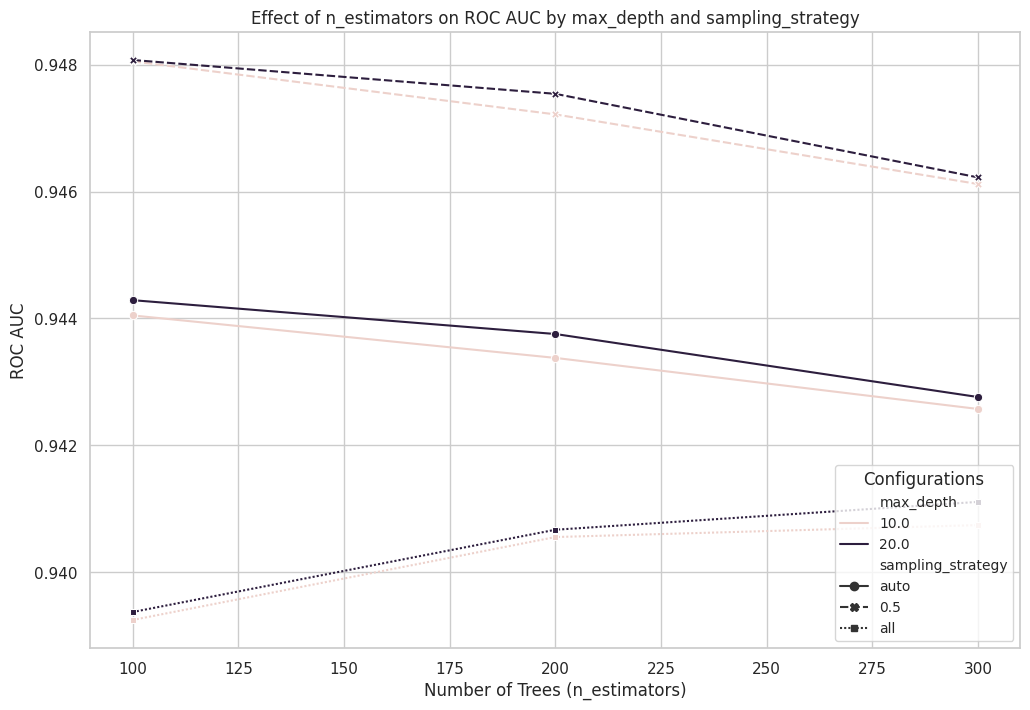

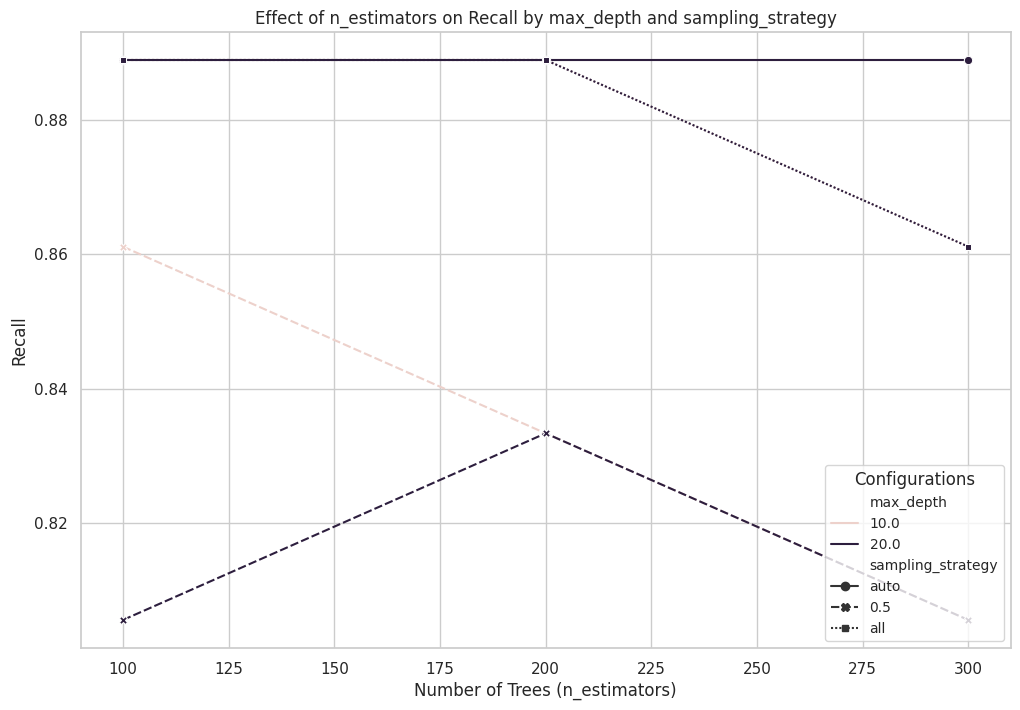

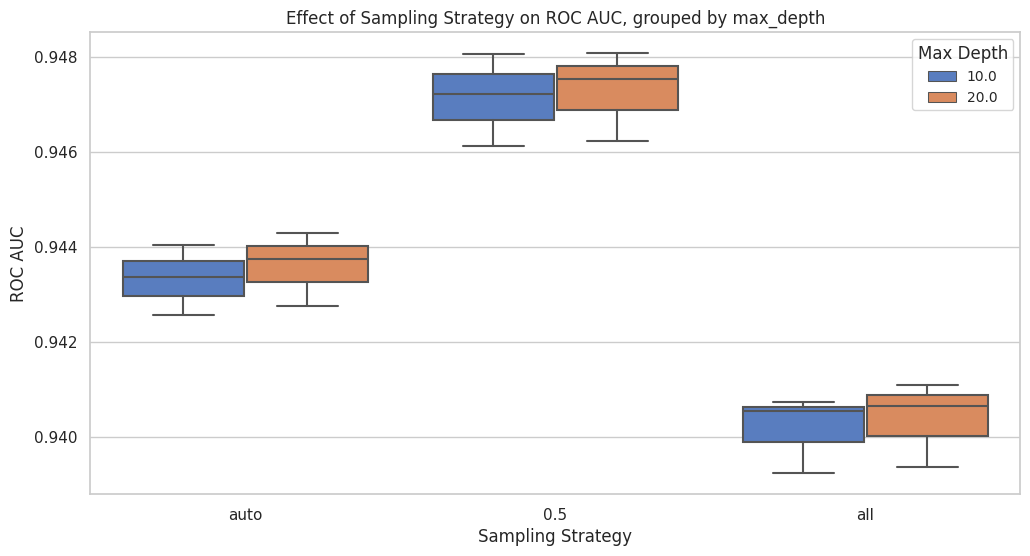

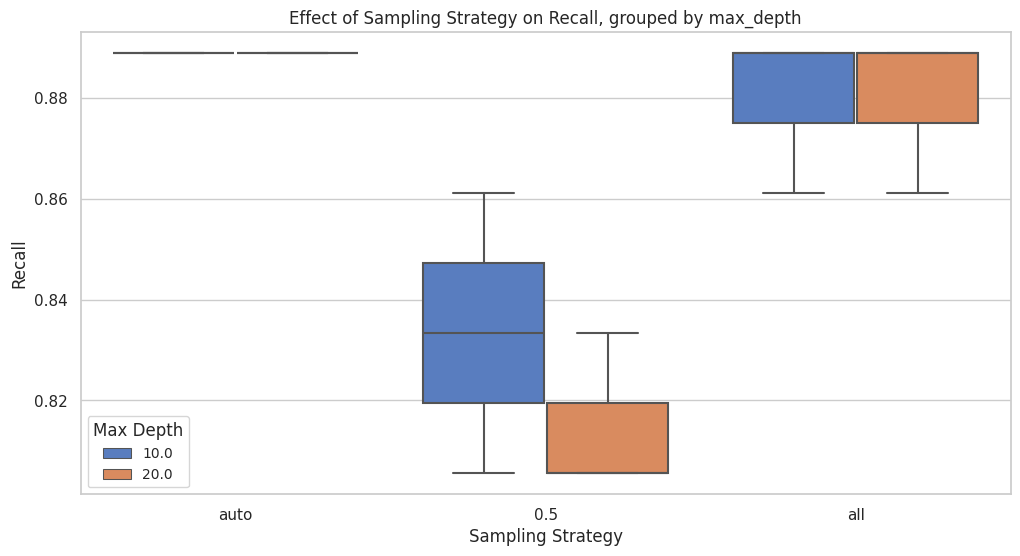

In [35]:
# Plot configurations
sns.set(style="whitegrid", palette="muted")

# Plot 1: Combined effects of max_depth, sampling_strategy, and n_estimators on ROC AUC
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=results_df,
    x='n_estimators',
    y='roc_auc',
    hue='max_depth',
    style='sampling_strategy',
    markers=True
)
plt.title('Effect of n_estimators on ROC AUC by max_depth and sampling_strategy')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('ROC AUC')
plt.legend(title="Configurations", loc="lower right", fontsize='small')
plt.show()

# Plot 2: Combined effects of max_depth, sampling_strategy, and n_estimators on Recall
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=results_df,
    x='n_estimators',
    y='recall',
    hue='max_depth',
    style='sampling_strategy',
    markers=True
)
plt.title('Effect of n_estimators on Recall by max_depth and sampling_strategy')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Recall')
plt.legend(title="Configurations", loc="lower right", fontsize='small')
plt.show()

# Plot 3: Boxplots for ROC AUC grouped by sampling_strategy
plt.figure(figsize=(12, 6))
sns.boxplot(data=results_df, x='sampling_strategy', y='roc_auc', hue='max_depth')
plt.title('Effect of Sampling Strategy on ROC AUC, grouped by max_depth')
plt.xlabel('Sampling Strategy')
plt.ylabel('ROC AUC')
plt.legend(title="Max Depth", fontsize='small')
plt.show()

# Plot 4: Boxplots for Recall grouped by sampling_strategy
plt.figure(figsize=(12, 6))
sns.boxplot(data=results_df, x='sampling_strategy', y='recall', hue='max_depth')
plt.title('Effect of Sampling Strategy on Recall, grouped by max_depth')
plt.xlabel('Sampling Strategy')
plt.ylabel('Recall')
plt.legend(title="Max Depth", fontsize='small')
plt.show()


## Final Model Improvement
Based on the insights gained from the tables and plots, the final model should balance high recall (to minimize missed bankruptcies) with a reasonable precision (to reduce false positives). A good choice is a configuration with:

- max_depth=20: Deep enough to capture meaningful patterns without overfitting excessively.
- sampling_strategy=0.5: Balances the oversampling of the minority class while maintaining good ROC AUC and recall.
- n_estimators=200: Provides sufficient stability and performance without significant diminishing returns.

In [36]:
# Final Model with Recommended Parameters
final_brf_model = BalancedRandomForestClassifier(
    random_state=42,
    max_depth=20,           # Recommended depth
    sampling_strategy=0.5,  # Balanced sampling strategy
    n_estimators=200        # Sufficient number of trees
)

# Train the model on the training data
final_brf_model.fit(X_train, Y_train)

# Predict on the validation set
y_pred_final = final_brf_model.predict(X_val)
y_prob_final = final_brf_model.predict_proba(X_val)[:, 1]

# Evaluate the model
print("Final Balanced Random Forest Model Performance")
print("Classification Report:")
print(classification_report(Y_val, y_pred_final))
print("Confusion Matrix:\n", confusion_matrix(Y_val, y_pred_final))
print("ROC AUC Score:", roc_auc_score(Y_val, y_prob_final))
print("Accuracy:", accuracy_score(Y_val, y_pred_final))


Final Balanced Random Forest Model Performance
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1328
           1       0.23      0.83      0.36        36

    accuracy                           0.92      1364
   macro avg       0.61      0.88      0.66      1364
weighted avg       0.97      0.92      0.94      1364

Confusion Matrix:
 [[1226  102]
 [   6   30]]
ROC AUC Score: 0.9475401606425702
Accuracy: 0.9208211143695014


- Explanation pending
- Graphs comparing balanced random forest vs final balanced after hyperparameter pending

Top 10 Important Features:
                                     Feature  Importance
28                      Borrowing dependency    0.068597
26                              Debt ratio %    0.055538
25                Total debt/Total net worth    0.049426
10   Persistent EPS in the Last Four Seasons    0.041049
19                     Net Value Growth Rate    0.038597
75                       Equity to Liability    0.035788
9                    Net Value Per Share (B)    0.034644
71        Net Income to Stockholder's Equity    0.031359
55                Total income/Total expense    0.029801
54         Retained Earnings to Total Assets    0.028079


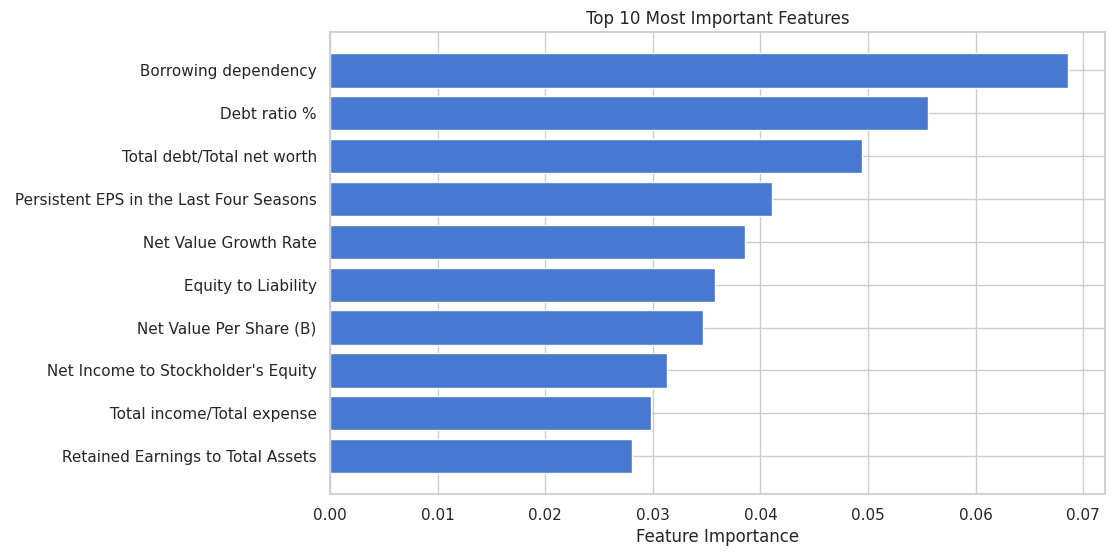

In [41]:
# Extract feature names from the original DataFrame
feature_names = df_reduced.drop(columns=['Bankrupt?']).columns

# Map feature importances to feature names
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': final_brf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("Top 10 Important Features:")
print(feature_importances.head(10))

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'].head(10), feature_importances['Importance'].head(10)) #color='blue'
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Top 10 Most Important Features')
plt.show()


## Validating our final model on test data

In [42]:
# Predict on the test set
y_pred_test = final_brf_model.predict(X_test)
y_prob_test = final_brf_model.predict_proba(X_test)[:, 1]

# Evaluate the model on the test set
print("Test Set Performance:")
print("Classification Report:")
print(classification_report(Y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_test))
print("ROC AUC Score:", roc_auc_score(Y_test, y_prob_test))
print("Accuracy:", accuracy_score(Y_test, y_pred_test))


Test Set Performance:
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1307
           1       0.30      0.79      0.44        57

    accuracy                           0.91      1364
   macro avg       0.65      0.85      0.70      1364
weighted avg       0.96      0.91      0.93      1364

Confusion Matrix:
 [[1203  104]
 [  12   45]]
ROC AUC Score: 0.9491402569162002
Accuracy: 0.9149560117302052
